In [1]:
# Import the operating system and python libraries for data cleaning and visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Check current working library
os.getcwd()

'C:\\Users\\Kaledia\\Documents\\Data_Science_Projects\\Machine Learning Tree Decision _Car Sales'

In [9]:
# Import csv data from local repository 
car=pd.read_csv ("Cars_Data_ML.csv")

# Check if data was successfully imported
car

,Make,Model,Type,Origin,DriveTrain,$MSRP,$Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,38203,2.4,5,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,40083,2.3,5,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,42573,2.9,6,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26135,24641,1.9,4,170,22,29,2822,101,180


In [10]:
# Summary Statistics of Data
car.describe()

,$MSRP,$Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.799065,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.559679,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


<AxesSubplot:>

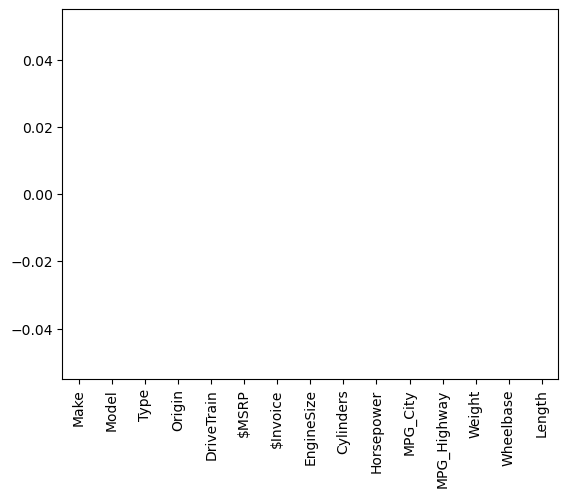

In [11]:
# Check if there are NaN values
car.isna().sum().plot(kind='bar')

In [12]:
# Convert to numeric the string values
car[["$MSRP", "$Invoice", "EngineSize", "Cylinders", "Horsepower", "MPG_City", "MPG_Highway", "Weight", "Wheelbase", "Length"]] = car[["$MSRP", "$Invoice", "EngineSize", "Cylinders", "Horsepower", "MPG_City", "MPG_Highway", "Weight", "Wheelbase", "Length"]].apply(pd.to_numeric)

In [16]:
# Create a new column with the mean of MPG_City and MPG_Highway
car["MPG_Combined"]= (car["MPG_City"] + car["MPG_Highway"])/2
print(car)

      Make                    Model   Type  Origin DriveTrain  $MSRP  \
0    Acura                      MDX    SUV    Asia        All  36945   
1    Acura           RSX Type S 2dr  Sedan    Asia      Front  23820   
2    Acura                  TSX 4dr  Sedan    Asia      Front  26990   
3    Acura                   TL 4dr  Sedan    Asia      Front  33195   
4    Acura               3.5 RL 4dr  Sedan    Asia      Front  43755   
..     ...                      ...    ...     ...        ...    ...   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  40565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  42565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  45210   
426  Volvo                      V40  Wagon  Europe      Front  26135   
427  Volvo                     XC70  Wagon  Europe        All  35145   

     $Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
0       33337         3.5          6         265        17  

In [23]:
# Import the algorithm Decision Tree from scikit-learn
from sklearn.tree import DecisionTreeClassifier

In [31]:
# Split the car data in features X and results y for Machine Learning
X = car[['EngineSize', 'Cylinders', 'Horsepower', 'Weight', 'Length', 'MPG_Combined']]
y = car['$MSRP']

In [33]:
# Split X and y in train and test data using train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Create the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [34]:
# Get the predictions 
predictions= model.predict(X_test)

In [35]:
predictions

array([12965, 29345, 24695, 28495, 26960, 22395, 12360, 27905, 27490,
       19005, 24345, 15460, 10760, 52795, 69995, 16385, 31545, 74995,
       17200, 52795, 30492, 26560, 25640, 22595, 21965, 12360, 23955,
       46265, 26560, 17163, 32495, 20220, 69995, 59995, 26910, 10995,
       22010, 42565, 27560, 29865, 19090, 26992, 75000, 65000, 22388,
       30860, 23845, 23955, 37885, 19339, 86970, 40235, 22395, 31045,
       16497, 20370, 42565, 32660, 22395, 79165, 29995, 42490, 24345,
       90520, 15460, 32660, 16497, 41250, 25135, 26470, 57270, 74320,
       31045, 76870, 23955, 74320, 20310, 27339, 29380, 69995, 29865,
       27200, 26992, 22000, 73195, 11939], dtype=int64)

In [38]:
# Quick check of the model with Acura MDX, got the correct price $MSRP
predictions_Acura_MDX= model.predict([[3.5, 6, 265, 4451, 189, 20]])
print(predictions_Acura_MDX)

[36945]


C:\Users\Kaledia\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [40]:
# Import and run the accuracy score
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test, predictions) 
print(score)



0.0


In [51]:
# With a score of 0.0, the model is not accurate to predict the price of cars because it does not take in account many parameters such as Make, Model, Type, Origin, so the data will be subset to Type sedan and Origin USA
car_Sedan_USA= car[(car['Type'] == 'Sedan') & (car['Origin'] == 'USA') & (car['DriveTrain'] == 'Front')
]
print(car_Sedan_USA)

       Make                Model   Type Origin DriveTrain  $MSRP  $Invoice  \
48    Buick   Century Custom 4dr  Sedan    USA      Front  22180     20351   
49    Buick   LeSabre Custom 4dr  Sedan    USA      Front  26470     24282   
50    Buick         Regal LS 4dr  Sedan    USA      Front  24895     22835   
51    Buick         Regal GS 4dr  Sedan    USA      Front  28345     26047   
52    Buick  LeSabre Limited 4dr  Sedan    USA      Front  32245     29566   
..      ...                  ...    ...    ...        ...    ...       ...   
346  Saturn             lon2 4dr  Sedan    USA      Front  14300     13393   
347  Saturn             lon3 4dr  Sedan    USA      Front  15825     14811   
348  Saturn  lon2 quad coupe 2dr  Sedan    USA      Front  14850     13904   
349  Saturn  lon3 quad coupe 2dr  Sedan    USA      Front  16350     15299   
350  Saturn           L300-2 4dr  Sedan    USA      Front  21410     19801   

     EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  

In [59]:
# Run the model prediction with the new dataframe car_Sedan_USA
# Split the car data in features X1 and results y1 for Machine Learning and reduce the number of features to 2
X1 = car_Sedan_USA[['EngineSize', 'Horsepower']]
y1 = car_Sedan_USA['$MSRP']

# Split X1 and y1 in train and test data using train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)
# Create the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X1_train, y1_train)

# Get the predictions 
predictions1= model.predict(X1_test)

# Import and run the accuracy score
from sklearn.metrics import accuracy_score 
score1 = accuracy_score(y1_test, predictions1) 
print(score1)

0.0


In [63]:
# Comparison of actual and predicted MSRP
Result=pd.DataFrame({'Actual':y1_test, 'Predicted':predictions1})
Result

,Actual,Predicted
316,18825,10995
318,28790,21825
81,27020,21825
99,33295,26860
71,16385,10995
102,38380,26470
48,22180,21410
106,13670,15040
111,24885,26860
325,35995,45445


In [62]:
# The model score is still 0.0 so we need to find another model.
# Let us create the Decision Tree graph
from sklearn import tree 
tree.export_graphviz(model, out_file='CarSales.dot', feature_names=['EngineSize', 'Horsepower'], label='all', rounded=True, filled=True)